<center><h1><strong>taudata Analytics</strong></h1></center>
<center><h2><strong><font color="blue">Supervised Learning - Classification 03</font></strong></h2></center>
<img alt="" src="images/covers/taudata-cover.jpg"/>

<b><center>(C) Taufik Sutanto</center>
<center><h3><font color="blue">https://taudata.blogspot.com/2022/04/slcm-03.html</font></h3></center>
    
<center><font color="blue">Ensemble and Imbalance learning</font></center>

In [8]:
print("Detecting environment: ", end=' ')
try:
    import google.colab
    IN_COLAB = True
    print("Running the code in Google Colab. Installing and downloading dependencies.\nPlease wait...")
    !pip install --upgrade pandas
except:
    IN_COLAB = False
    print("Running the code locally.")
# Please visit https://github.com/taudataid/PINN-DCAI for further detail such as requirements.txt file.

Detecting environment:  Running the code locally.


In [9]:
# Loading Modules
import warnings; warnings.simplefilter('ignore')
import pickle, time, numpy as np, seaborn as sns
import pandas as pd, matplotlib.pyplot as plt 
from sklearn import svm, preprocessing
from sklearn import  tree, neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import make_pipeline 
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from collections import Counter
from tqdm import tqdm
sns.set(style="ticks", color_codes=True)
print(pd.__version__)
"Done"

1.3.4


'Done'

In [10]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
file = 'data/diabetes_data.csv'

try:
    # Local jupyter notebook, assuming "file" is in the "data" directory
    data = pd.read_csv(file, names=names)
except:
    # it's a google colab... create folder data and then download the file from github
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/{file}
    data = pd.read_csv(file, names=names)
    
print(data.shape, set(data['class']))
data.sample(5)

(768, 9) {0, 1}


,preg,plas,pres,skin,test,mass,pedi,age,class
40,3,180,64,25,70,34.0,0.271,26,0
643,4,90,0,0,0,28.0,0.610,31,0
623,0,94,70,27,115,43.5,0.347,21,0
629,4,94,65,22,0,24.7,0.148,21,0
294,0,161,50,0,0,21.9,0.254,65,0


In [11]:
# Split Train-Test

X = data.values[:,:8]  # Slice data (perhatikan disini struktur data adalah Numpy Array)
Y = data.values[:,8]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=99)

print(set(Y), x_train.shape, x_test.shape, sep=', ')

{0.0, 1.0}, (614, 8), (154, 8)


# <center><font color="blue">Ensemble Model</font></center>

<ul>
	<li>What? a learning algorithms that construct a set of classifiers and then classify new data points by taking a (weighted) vote of their predictions.</li>
	<li>Why? Better prediction, More stable model</li>
	<li>How? Bagging &amp; Boosting</li>
</ul>
<img alt="" src="images/Ensemble.png" style="width: 500px; height: 213px;" />

# <center><font color="blue">“meta-algorithms” : Bagging & Boosting</font></center>

<p><img style="undefined: undefined;" src="images/Bagging_VS_Boosting.png" alt="" width="911" height="337" /></p>

* Ensemble https://www.youtube.com/watch?v=Un9zObFjBH0 
* Bagging https://www.youtube.com/watch?v=2Mg8QD0F1dQ 
* Boosting https://www.youtube.com/watch?v=GM3CDQfQ4sw

# <center><font color="blue">Property of Boosting</font></center>
<img alt="" src="images/Bagging-Boosting_Usage.png" style="width: 500px; height: 281px;" />

# <center><font color="blue">AdaBoost</font></center>
<ul>
	<li><a href="https://youtu.be/BoGNyWW9-mE?t=70" target="_blank">https://youtu.be/BoGNyWW9-mE?t=70</a></li>
</ul>
<img alt="" src="images/AdaBoost.png" style="width: 400px; height: 332px;" />

In [12]:
# Contoh Voting (Bagging) di Python
# Catatan : Random Forest termasuk Bagging Ensemble (walau modified)
# Best practicenya Model yang di ensemble semuanya menggunakan Optimal Parameter

kNN = neighbors.KNeighborsClassifier(3)
kNN.fit(x_train, y_train)
Y_kNN = kNN.score(x_test, y_test)

DT = tree.DecisionTreeClassifier(random_state=1)
DT.fit(x_train, y_train)
Y_DT = DT.score(x_test, y_test)

model = VotingClassifier(estimators=[('k-NN', kNN), ('Decision Tree', DT)], voting='hard')
model.fit(x_train,y_train)
Y_Vot = model.score(x_test,y_test)

print('Akurasi k-NN', Y_kNN)
print('Akurasi Decision Tree', Y_DT)
print('Akurasi Votting', Y_Vot)

Akurasi k-NN 0.7142857142857143
Akurasi Decision Tree 0.6818181818181818
Akurasi Votting 0.7337662337662337


In [13]:
# Averaging juga bisa digunakan di Klasifikasi (ndak hanya Regresi), 
# tapi kita pakai probabilitas dari setiap kategori
T = tree.DecisionTreeClassifier()
K = neighbors.KNeighborsClassifier()
R = LogisticRegression()

T.fit(x_train,y_train)
K.fit(x_train,y_train)
R.fit(x_train,y_train)

y_T=T.predict_proba(x_test)
y_K=K.predict_proba(x_test)
y_R=R.predict_proba(x_test)

Ave = (y_T+y_K+y_R)/3
print(Ave[:5]) # Print just first 5
prediction = [v.index(max(v)) for v in Ave.tolist()]
print(prediction[:5]) # Print just first 5
print('Akurasi Averaging', accuracy_score(y_test, prediction))

[[0.86747807 0.13252193]
 [0.96569616 0.03430384]
 [0.90409317 0.09590683]
 [0.81735062 0.18264938]
 [0.97683155 0.02316845]]
[0, 0, 0, 0, 0]
Akurasi Averaging 0.7402597402597403


In [14]:
# AdaBoost
num_trees = 100
kfold = model_selection.KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=33)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7421565276828435


# <center><font color="blue">Imbalance Data</font></center>

* Metric Trap
* Akurasi kategori tertentu lebih penting
* Contoh kasus
<img alt="" src="images/imbalance.png" />

# <center><font color="blue">Imbalance Learning</font></center>

<img alt="" src="images/under-over-sampling.png" style="width: 500px; height: 147px;" />

* Undersampling, Oversampling, Model Based (weight adjustment)
* https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets
* Plot perbandingan: https://imbalanced-learn.readthedocs.io/en/stable/auto_examples/combine/plot_comparison_combine.html#sphx-glr-auto-examples-combine-plot-comparison-combine-py

In [15]:
Counter(Y)

Counter({1.0: 268, 0.0: 500})

In [16]:
# fit the model and get the separating hyperplane using weighted classes

svm_ = svm.SVC(kernel='linear')
svm_.fit(x_train, y_train)
y_SVMib = svm_.predict(x_test)

print(confusion_matrix(y_test, y_SVMib))
print(classification_report(y_test, y_SVMib))

[[93 12]
 [19 30]]
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       105
         1.0       0.71      0.61      0.66        49

    accuracy                           0.80       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.79      0.80      0.79       154



In [17]:
# fit the model and get the separating hyperplane using weighted classes
# x_train, x_test, y_train, y_test

svm_balanced = svm.SVC(kernel='linear', class_weight={1: 3}) #WEIGHTED SVM
svm_balanced.fit(x_train, y_train)
y_SVMb = svm_balanced.predict(x_test)

print(confusion_matrix(y_test, y_SVMb))
print(classification_report(y_test, y_SVMb))

[[67 38]
 [ 7 42]]
              precision    recall  f1-score   support

         0.0       0.91      0.64      0.75       105
         1.0       0.53      0.86      0.65        49

    accuracy                           0.71       154
   macro avg       0.72      0.75      0.70       154
weighted avg       0.78      0.71      0.72       154



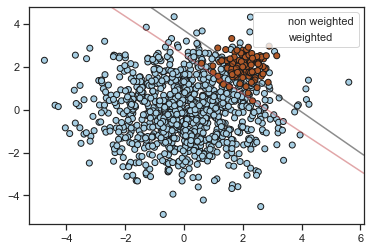

In [18]:
# Example of model-based imbalance treatment - SVM
from sklearn.datasets import make_blobs
n_samples_1, n_samples_2 = 1000, 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],centers=centers,cluster_std=clusters_std,random_state=33, shuffle=False)

# fit the model and get the separating hyperplane
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel='linear', class_weight={1: 10}) #WEIGHTED SVM
wclf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')# plot the samples
ax = plt.gca()# plot the decision functions for both classifiers
xlim = ax.get_xlim(); ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)# create grid to evaluate model
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)# get the separating hyperplane
a = ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-']) # plot decision boundary and margins
Z = wclf.decision_function(xy).reshape(XX.shape)# get the separating hyperplane for weighted classes
b = ax.contour(XX, YY, Z, colors='r', levels=[0], alpha=0.5, linestyles=['-'])# plot decision boundary and margins for weighted classes
plt.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"], loc="upper right")
plt.show()

# <center><font color="blue">Weighted Decision Tree</font></center>

In [19]:
T = tree.DecisionTreeClassifier(random_state = 33)
T.fit(x_train,y_train)
y_DT = T.predict(x_test)
print('Akurasi  (Decision tree Biasa) = ', accuracy_score(y_test, y_DT))
print(classification_report(y_test, y_DT))

T = tree.DecisionTreeClassifier(class_weight = 'balanced', random_state = 33)
T.fit(x_train, y_train)
y_DT = T.predict(x_test)
print('Akurasi  (Weighted Decision tree) = ', accuracy_score(y_test, y_DT))
print(classification_report(y_test, y_DT))

Akurasi  (Decision tree Biasa) =  0.6883116883116883
              precision    recall  f1-score   support

         0.0       0.79      0.73      0.76       105
         1.0       0.51      0.59      0.55        49

    accuracy                           0.69       154
   macro avg       0.65      0.66      0.65       154
weighted avg       0.70      0.69      0.69       154

Akurasi  (Weighted Decision tree) =  0.7207792207792207
              precision    recall  f1-score   support

         0.0       0.83      0.74      0.78       105
         1.0       0.55      0.67      0.61        49

    accuracy                           0.72       154
   macro avg       0.69      0.71      0.69       154
weighted avg       0.74      0.72      0.73       154



# <center><font color="blue"> Studi Kasus (Latihan) ENB2012: Prediksi Penggunaan Energi Gedung</font></center>

<img src="images/buildings-by-calibrated-simulation.png" alt="" width="503" height="377" />

# <font color="green"> Task</font></center>

* Filter data EcoTest dan pilih hanya yang kategori di variabel target muncul min 10 kali (heat-cat)
* Lakukan EDA (Preprocessing dan visualisasi dasar)
* Tentukan model terbaik (dengan parameter optimal dan cross validasi)
* Hati-hati Naive Bayes, Decision Tree dan Random Forest tidak memerlukan one-hot encoding.
* Gunakan Metric Micro F1-Score untuk menentukan model terbaiknya.

# <font color="green">Optional</font></center>
* Coba bandingkan model terbaik diatas dengan model ensemble.
* Apakah ada imbalance problem, coba atasi dengan over/under sampling.

In [20]:
file_ = "data/building-energy-efficiency-ENB2012_data.csv"

try: # Running Locally, yakinkan "file_" berada di folder "data"
    data = pd.read_csv(file_, error_bad_lines=False, low_memory = False, encoding='utf8')
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/{file_}
    data = pd.read_csv(file_, error_bad_lines=False, low_memory = False, encoding='utf8')
print(data.shape)
data.sample(5)

(768, 12)


,compactness,surface-area,wall-area,roof-area,overall-height,orientation,glazing-area,glazing-dist,heating-load,cooling-load,heat-cat,cool-cat
375,0.66,759.5,318.5,220.5,3.5,5,0.25,2,13.00,15.87,13,15
636,0.82,612.5,318.5,147.0,7.0,2,0.40,3,28.67,32.43,28,32
201,0.86,588.0,294.0,147.0,7.0,3,0.10,4,25.37,31.76,25,31
542,0.82,612.5,318.5,147.0,7.0,4,0.40,1,29.53,28.99,29,28
506,0.74,686.0,245.0,220.5,3.5,4,0.25,5,11.64,14.81,11,14


In [21]:
# Jawaban Latihan dimulai di cell ini


# <center><font color="blue"> Akhir Modul SLCM-03</font></center>

<hr />
<img alt="" src="images/meme-cartoon/Meme Deep Learning SVM.jpg" style="height: 400px;"/>